In [1]:
from src.preprocessing.augmentations import Augmentations
from src.preprocessing.preprocess_ucr import AugUCRDataset, UCRDataset, UCRDatasetImporter
import matplotlib.pyplot as plt

self.X_train.shape: (7200, 46)
self.X_test.shape: (16800, 46)
# unique labels (train): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
# unique labels (test): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
len(subxs_pairs): 2


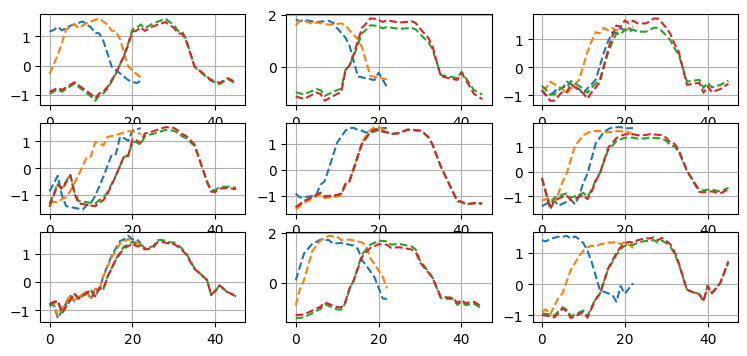

In [24]:

import os
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# data pipeline
augs = Augmentations()
dataset_importer = UCRDatasetImporter("Crop", data_scaling=True)
dataset = AugUCRDataset("train", dataset_importer, augs, ['RC','AmpR'], subseq_lens=[23, 46])
regdataset = UCRDataset('train', dataset_importer)
data_loader = DataLoader(dataset, batch_size=128, num_workers=0, shuffle=False)
data_loader2 = DataLoader(regdataset, batch_size=64, num_workers=0, shuffle=False)
# get a mini-batch of samples
for batch in data_loader:
    subxs_pairs, y = batch
    break

for batch in data_loader2:
    xs, y = batch
    break
print('len(subxs_pairs):', len(subxs_pairs))

# plot
plt.figure(figsize=(9, 4))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    for subxs_pair in subxs_pairs:
        subx1, subx2 = subxs_pair
        plt.plot(subx1[i, 0, :], linestyle='--')
        plt.plot(subx2[i, 0, :], linestyle='--')

    plt.grid()
plt.show()

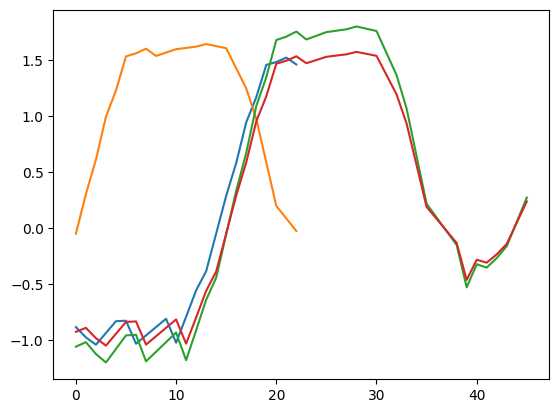

In [38]:

import numpy as np
subxs_pair1 = subxs_pairs[0]
subx1, subx2 = subxs_pair1
subx11, subx22 = subxs_pairs[1]
i = 12
plt.plot(subx1[i, 0, :])
plt.plot(subx2[i, 0, :])
plt.plot(subx11[i, 0, :])
plt.plot(subx22[i, 0, :])


In [ ]:
subxs_pair1 = subxs_pairs[1]
subx1, subx2 = subxs_pair1
plt.plot(subx1[0, 0, :])
plt.plot(subx2[0, 0, :])

In [26]:
import torch
i = 20
x1 = torch.flatten(subxs_pair[0][2], start_dim=0)
x2 = torch.flatten(subxs_pair[1][2], start_dim=0)
x_real = torch.flatten(xs[i], start_dim=0)

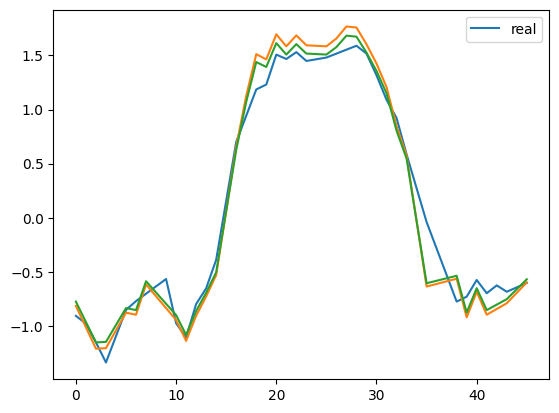

In [27]:
plt.plot(x_real, label="real")
plt.plot(x1)
plt.plot(x2)
plt.legend()

In [12]:
for batch in data_loader:
    subxs_pairs, y = batch
    x1, x2 = subxs_pairs



In [13]:
from src.models.con_vqvae import BarlowTwinsVQVAE
from src.preprocessing.data_pipeline import build_data_pipeline
from src.utils import load_yaml_param_settings

In [14]:
config_dir = 'src/configs/config.yaml' #dir to config file

config = load_yaml_param_settings(config_dir)

# data pipeline
dataset_importer = UCRDatasetImporter(**config['dataset'])
batch_size = config['dataset']['batch_sizes']['vqvae']
train_data_loader_non_aug, test_data_loader= [build_data_pipeline(batch_size, dataset_importer, config, kind) for kind in ['train', 'test']]

augs = Augmentations()
num_workers = config['dataset']["num_workers"]
train_dataset = AugUCRDataset("train", dataset_importer, augs, ['RC', 'AmpR'], subseq_lens=[23, 46])
train_data_loader_aug = DataLoader(dataset=train_dataset, batch_size=batch_size, num_workers=0, shuffle=True)

FileNotFoundError: [Errno 2] No such file or directory: 'src/configs/config.yaml'